# Predicting and Optimizing Ride Demand Allocation For Uber Using Data Analysis and Machine Learning 

## Goal 
- The goal for this project is to predict and optimize ride demand allocation for Uber by leveraging data analysis and machine learning techniques. This involves developing models to forecast ride demand in different locations and times, optimizing driver allocation to meet demand efficiently, reducing wait times for passengers, maximizing driver utilization, and ultimately enhancing the overall user experience and operational efficiency of the Uber platform.

## Feature Analysis

###### Time of Day:
- Indicates the time period of the day when the data was recorded, categorized as "Morning," "Afternoon," "Evening," or "Night."

###### Day of Week:
- Represents the day of the week when the data was recorded, such as "Monday," "Tuesday," etc.

###### Weather:
- Describes the prevailing weather condition at the time of data recording, such as "Sunny," "Rainy," or "Cloudy."

###### Temperature (°C):
- Represents the temperature in degrees Celsius at the time of data recording.

###### Ride Demand:
- Indicates the level of demand for rides, categorized as "Low," "Medium," or "High."

###### Driver Availability:
- Represents the availability of drivers for providing rides, categorized as "Low," "Medium," or "High."

###### Traffic Congestion:
- Indicates the level of traffic congestion, categorized as "Low," "Medium," or "High."

###### Area:
- Represents the geographical area where the data was recorded, such as "Downtown" or "Suburbs."

# Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Data

In [15]:
import numpy as np
import pandas as pd

# Try reading the CSV file with a different encoding
df = pd.read_csv('ride_demand_allocation_dataset.csv')

# Display the first few rows of the DataFrame
df.head()

,Time of Day,Day of Week,Weather,Temperature (°C),Ride Demand,Driver Availability,Traffic Congestion,Area
0,Evening,Saturday,Rainy,26,Medium,Medium,Low,Downtown
1,Night,Sunday,Rainy,25,Low,Low,High,Suburbs
2,Morning,Monday,Sunny,24,High,Medium,Low,Suburbs
3,Evening,Monday,Cloudy,17,Medium,Low,Low,Suburbs
4,Evening,Monday,Cloudy,17,Medium,High,High,Downtown


# Exploratory Data Analysis

## Summary statistics

In [16]:
print(df.describe()) 

       Temperature (°C)
count        1000.00000
mean           21.96000
std             4.38379
min            15.00000
25%            18.00000
50%            22.00000
75%            26.00000
max            29.00000


### Distribution of categorical features

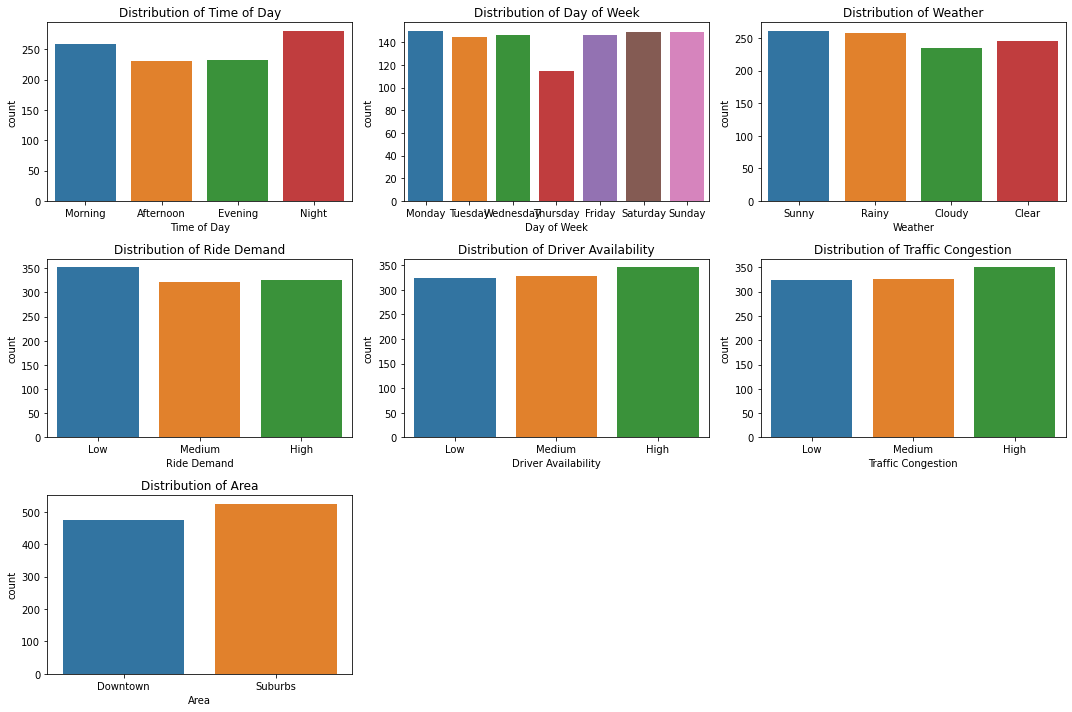

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.countplot(x='Time of Day', data=df, order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Distribution of Time of Day')

plt.subplot(3, 3, 2)
sns.countplot(x='Day of Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Day of Week')

plt.subplot(3, 3, 3)
sns.countplot(x='Weather', data=df, order=['Sunny', 'Rainy', 'Cloudy', 'Clear'])
plt.title('Distribution of Weather')

plt.subplot(3, 3, 4)
sns.countplot(x='Ride Demand', data=df, order=['Low', 'Medium', 'High'])
plt.title('Distribution of Ride Demand')

plt.subplot(3, 3, 5)
sns.countplot(x='Driver Availability', data=df, order=['Low', 'Medium', 'High'])
plt.title('Distribution of Driver Availability')

plt.subplot(3, 3, 6)
sns.countplot(x='Traffic Congestion', data=df, order=['Low', 'Medium', 'High'])
plt.title('Distribution of Traffic Congestion')

plt.subplot(3, 3, 7)
sns.countplot(x='Area', data=df, order=['Downtown', 'Suburbs'])
plt.title('Distribution of Area')

plt.tight_layout()
plt.show()

### Relationship between features and ride demand

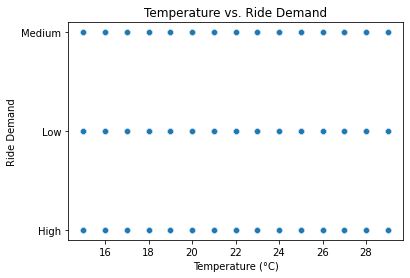

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example scatter plot for Temperature vs. Ride Demand
sns.scatterplot(x='Temperature (°C)', y='Ride Demand', data=df)
plt.title('Temperature vs. Ride Demand')
plt.show()

# Correlation Matrix

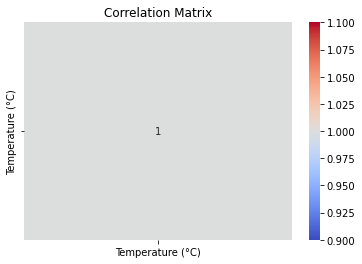

In [19]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Graph Shows
- A correlation matrix shows the strength and direction of relationships between pairs of variables. 
- A correlation value of 1 means that there is a perfect positive relationship: as one variable increases, the other variable also increases perfectly in sync. In simple terms, they move together perfectly.

# Machine Learning Model 

In [20]:
# Load the dataset
df = pd.read_csv("ride_demand_allocation_dataset.csv")

# Separate features (X) and target variable (y)
X = df.drop('Ride Demand', axis=1)
y = df['Ride Demand']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Model Evaluation
- Find Accuracy_score

In [12]:
# Train and evaluate each classifier
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
# Display results
for name, accuracy in results.items():
    print(f'{name}: Accuracy = {accuracy:.4f}')

Random Forest: Accuracy = 0.2850
KNN: Accuracy = 0.2950


# Confusion Matrix Analysis

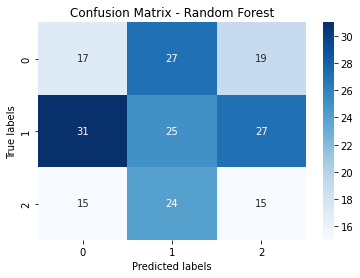

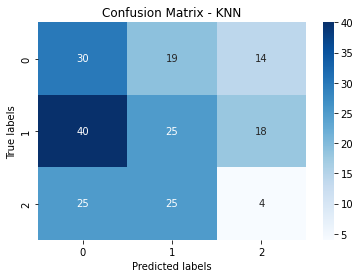

In [8]:
# Initialize classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Final Modal 

In [13]:
# Load the dataset
df = pd.read_csv("ride_demand_allocation_dataset.csv")

# Separate features (X) and target variable (y)
X = df.drop('Ride Demand', axis=1)
y = df['Ride Demand']

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Function to accept user input and make prediction
def predict_ride_demand():
    # Accept user input for each feature
    time_of_day = input("Enter time of day (Morning/Afternoon/Evening/Night): ")
    day_of_week = input("Enter day of week (Monday/Tuesday/Wednesday/Thursday/Friday/Saturday/Sunday): ")
    weather = input("Enter weather (Sunny/Rainy/Cloudy/Clear): ")
    temperature = float(input("Enter temperature (°C): "))
    driver_availability = input("Enter driver availability (Low/Medium/High): ")
    traffic_congestion = input("Enter traffic congestion (Low/Medium/High): ")
    area = input("Enter area (Downtown/Suburbs): ")
    
    # Create DataFrame with user input
    input_data = {
        'Time of Day': [time_of_day],
        'Day of Week': [day_of_week],
        'Weather': [weather],
        'Temperature (°C)': [temperature],
        'Driver Availability': [driver_availability],
        'Traffic Congestion': [traffic_congestion],
        'Area': [area]
    }
    input_df = pd.DataFrame(input_data)
    
    # Convert categorical variables into dummy/indicator variables
    input_df = pd.get_dummies(input_df)
    
    # Ensure input DataFrame has the same columns as the original dataset
    missing_cols = set(X.columns) - set(input_df.columns)
    for col in missing_cols:
        input_df[col] = 0
    
    # Reorder columns to match the original dataset
    input_df = input_df[X.columns]
    
    # Make prediction
    prediction = rf_classifier.predict(input_df)
    return prediction[0]

# Make prediction
prediction = predict_ride_demand()
print("Predicted Ride Demand:", prediction)

Enter time of day (Morning/Afternoon/Evening/Night): Night
Enter day of week (Monday/Tuesday/Wednesday/Thursday/Friday/Saturday/Sunday): Monday
Enter weather (Sunny/Rainy/Cloudy/Clear): Rainy
Enter temperature (°C): 45
Enter driver availability (Low/Medium/High): Low
Enter traffic congestion (Low/Medium/High): HIgh
Enter area (Downtown/Suburbs): Downtown
Predicted Ride Demand: High
